## Training your custom Dataset using YOLO11

Installation

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.2/112.6 GB disk)


Dataset Preparation --(roboflow website)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/YOLO_DATASET

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/YOLO_DATASET


In [ ]:
!unzip /content/drive/MyDrive/YOLO_DATASET/RSPDataset.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/images/20220216_222229_jpg.rf.ad38db540d968b7bf6689b1fa4f95e45.jpg  
 extracting: train/images/20220216_222229_jpg.rf.b88e2d7d087960b3398f2f4db287d23b.jpg  
 extracting: train/images/20220216_222229_jpg.rf.ebc361359c5cfc4564e9a67a270c4c4c.jpg  
 extracting: train/images/20220216_222247_jpg.rf.619399ee585a03994872dc396a321e3d.jpg  
 extracting: train/images/20220216_222247_jpg.rf.c2ccc2d3c9d95122778959ee13fed4b0.jpg  
 extracting: train/images/20220216_222247_jpg.rf.edc16f863e6734d21e72e158f07d8b28.jpg  
 extracting: train/images/20220216_222635_jpg.rf.3bd0476cbf688dd53fccb2800b562403.jpg  
 extracting: train/images/20220216_222635_jpg.rf.769576885a2033a8057e536ee5d07889.jpg  
 extracting: train/images/20220216_222635_jpg.rf.e7940d3a378e3f71288cab2d0f73a5eb.jpg  
 extracting: train/images/20220216_222713_jpg.rf.cbb72ec5030c7811dc6da27259b66c81.jpg  
 extracting: train/images/20220216_222713_jpg.rf.e9e22a28d59e59434b9a

## Using the Command Line Interface

Starting the training procedure

In [ ]:
# Train YOLO11n on Rock Paper Scissors Dataset for 25 epochs
!yolo train model=yolo11m.pt data="/content/drive/MyDrive/YOLO_DATASET/data.yaml" epochs=25 imgsz=640

100% 38.8M/38.8M [00:00<00:00, 158MB/s]
Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/YOLO_DATASET/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

Validating the trained model

In [ ]:
# Validate Trained Model on Validation Set
!yolo val model="/content/drive/MyDrive/YOLO_DATASET/runs/detect/train/weights/best.pt" data="/content/drive/MyDrive/YOLO_DATASET/data.yaml"

Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.8±0.3 ms, read: 22.9±8.1 MB/s, size: 32.4 KB)
val: Scanning /content/drive/MyDrive/YOLO_DATASET/valid/labels.cache... 576 images, 238 backgrounds, 0 corrupt: 100% 576/576 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 36/36 [00:15<00:00,  2.32it/s]
                   all        576        400      0.948      0.897       0.94      0.754
                 Paper        132        139      0.953      0.899      0.946       0.76
                  Rock        121        141      0.926       0.89      0.937      0.753
              Scissors        116        120      0.963        0.9      0.937      0.749
Speed: 0.8ms preprocess, 22.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more

### Inferencing with our trained Model

In [ ]:
# Visualize the Predicted image function
import cv2
from google.colab.patches import cv2_imshow

def show_image(image_path):
    """
    Function to display an image using OpenCV in Google Colab.

    Parameters:
    - image_path (str): Path to the image file.
    """
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found!")
        return

    cv2_imshow(image)

In [ ]:
# Inferencing with our trained model

!yolo predict model="/content/drive/MyDrive/YOLO_DATASET/runs/detect/train/weights/best.pt" source="/content/drive/MyDrive/YOLO_DATASET/train/images/0001_png.rf.5e009a9ec5fbf7a8e856ba7f413996af.jpg"

Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs

image 1/1 /content/drive/MyDrive/YOLO_DATASET/train/images/0001_png.rf.5e009a9ec5fbf7a8e856ba7f413996af.jpg: 640x640 2 Rocks, 36.8ms
Speed: 3.2ms preprocess, 36.8ms inference, 137.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


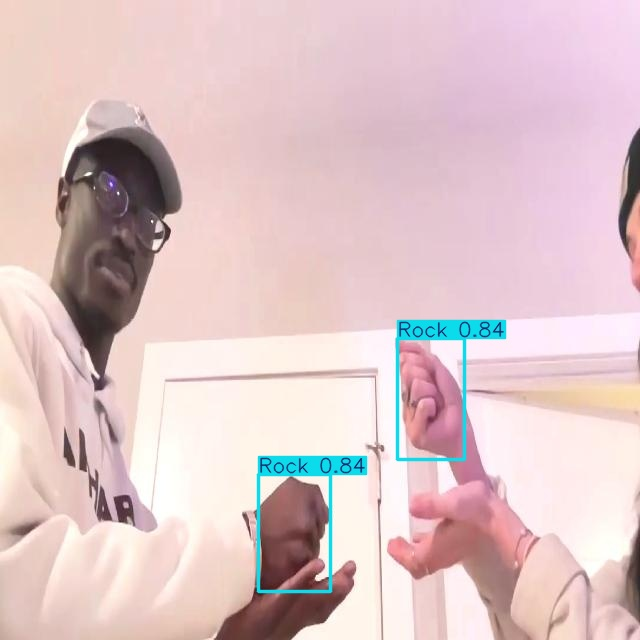

In [ ]:
show_image("/content/drive/MyDrive/YOLO_DATASET/runs/detect/predict/0001_png.rf.5e009a9ec5fbf7a8e856ba7f413996af.jpg")